# Projeto python  para DataScience: limpando os dados

# Itens do pedido

## 📚 Dicionário de dados

| **Campo**           | **Descrição**                  | **Tipo**         | **Exemplo**   | **Observações**                                                                                  |
| ------------------- | ------------------------------ | ---------------- | ------------- | ------------------------------------------------------------------------------------------------ |
| `pedido_id`         | Identificador único do pedido  | numérico (int)   | 6001          | Cada pedido pode ter 1 ou mais itens associados.                                                 |
| `categoria_produto` | Categoria do produto adquirido | texto            | "Eletrônicos" | Ex: Eletrônicos, Moda, Livros, Esporte, Casa.                                                    |
| `nome_produto`      | Nome do produto                | texto            | "Smartphone"  | Pode conter valores vazios (`' '`, `NaN`).                                                       |
| `preco_unitario`    | Preço unitário do produto      | numérico (float) | 1599,99       | Pode conter outliers (ex: > R\$10.000), erros de tipo (`valor_invalido`), vazios (`' '`, `NaN`). |
| `quantidade`        | Quantidade do produto comprado | numérico (int)   | 2             | Pode conter outliers (ex: > 50), valores vazios ou inválidos (`' '`, `NaN`).                     |


## 📌 Regras de Negócio - Limites de Preço por Categoria


Os limites de preço definidos para cada categoria são:

- **Livros**
  - Preço mínimo: R\$ 5
  - Preço máximo: R\$ 500

- **Eletrônicos**
  - Preço mínimo: R\$ 300
  - Preço máximo: R\$ 8.000

- **Casa**
  - Preço mínimo: R\$ 100
  - Preço máximo: R\$ 10.000

- **Esporte**
  - Preço mínimo: R\$ 10
  - Preço máximo: R\$ 1.000

- **Moda**
  - Preço mínimo: R\$ 5
  - Preço máximo: R\$ 5.000

💡 Objetivo das Regras

- Garantir que os preços estejam dentro de valores plausíveis para o negócio.
- Ajudar na identificação e remoção de outliers (valores anômalos).
- Melhorar a qualidade das análises e evitar distorções nos indicadores.



## ⬇️ Importando e conhecendo a base de dados

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_itens_pedido = pd.read_csv('/content/drive/MyDrive/Dados/Projeto Python da DS/Itens_Pedidos_Ecommerce (1).csv', sep = ';')
df_itens_pedido.head()

,pedido_id,categoria_produto,nome_produto,preco_unitario,quantidade
0,6001,Livros,Biografia,"1127,05","3,0"
1,6001,Eletrônicos,Smartphone,"3855,81","1,0"
2,6002,Casa,Sofá,"3017,38","1,0"
3,6002,Casa,Aspirador de Pó,"37,62","2,0"
4,6002,Casa,Cadeira,"762,73","3,0"


In [ ]:
df_itens_pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21041 entries, 0 to 21040
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pedido_id          21041 non-null  int64 
 1   categoria_produto  21041 non-null  object
 2   nome_produto       20817 non-null  object
 3   preco_unitario     20386 non-null  object
 4   quantidade         20595 non-null  object
dtypes: int64(1), object(4)
memory usage: 822.0+ KB


## 🧹Limpando e tratando dados

### Limpando dados duplicados

Vamos verificar primeiro se tem dados duplicados e quantos são se tiver

In [ ]:
df_itens_pedido.duplicated().sum()

np.int64(1)

Removendo as duplicatas e atualizando o df principal

In [ ]:
df_itens_pedido.drop_duplicates(inplace=True)

### Verificando Outliers na coluna preco_unitario

#### 📌 Conversão dos preços para float
Convertendo os preços de string (com vírgula como separador decimal) para float (com ponto).
Isso é necessário para fazer cálculos e gráficos.


In [ ]:
df_itens_pedido['preco_unitario'] = df_itens_pedido['preco_unitario'].str.replace(',', '.', regex=False).astype(float)

#### 📌 Estatísticas descritivas por categoria de produto
Gerando estatísticas básicas como média, min, max, quartis para cada categoria.
Isso nos ajuda a ter uma ideia inicial da distribuição dos preços.


In [ ]:
df_itens_pedido.groupby('categoria_produto')['preco_unitario'].describe()

,count,mean,std,min,25%,50%,75%,max
categoria_produto,,,,,,,,
Casa,4130.0,3009.667535,5708.934167,30.61,1310.7150,2531.000,3778.9525,95229.91
Eletrônicos,4038.0,2837.371352,5062.002568,30.35,1239.5050,2426.265,3733.3650,94547.98
Esporte,4064.0,2784.455089,4266.580323,30.72,1263.9875,2493.650,3768.3300,99232.85
Livros,4046.0,2935.748707,5680.856340,30.73,1215.4100,2518.425,3776.7125,96571.61
Moda,4108.0,2846.532113,4763.296909,31.88,1272.4300,2514.695,3781.3475,96453.64


<Axes: xlabel='preco_unitario'>

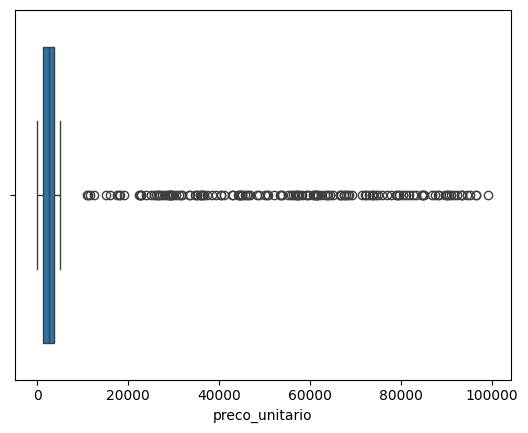

In [ ]:
sns.boxplot(x=df_itens_pedido['preco_unitario'])

#### 📌 Função para remoção de outliers pelo método IQR
Esta função calcula os quartis, o intervalo interquartil (IQR) e remove os valores fora dos limites padrão (1.5 * IQR).


In [ ]:
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    mask = (df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)
    return df[mask].copy()

In [ ]:
df_itens_pedido_semOutliers = remover_outliers_iqr(df_itens_pedido,'preco_unitario')

<Axes: xlabel='preco_unitario'>

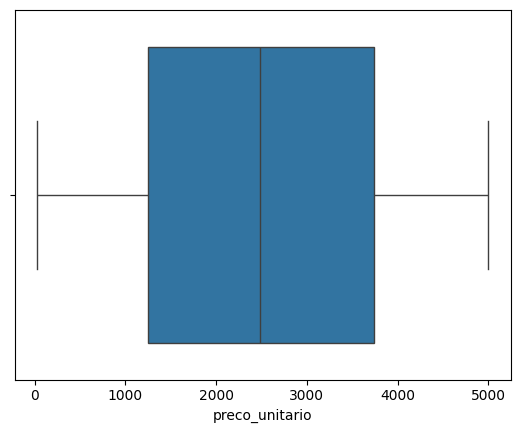

In [ ]:
sns.boxplot(x=df_itens_pedido_semOutliers['preco_unitario'])

#### 📌 Definição dos limites de negócio por categoria
Criando um dicionário com os preços mínimo e máximo aceitáveis para cada categoria de produto, com base no contexto do negócio.


In [ ]:
limites_negocio = {
    'Livros': {'min': 5, 'max': 500},
    'Eletrônicos': {'min': 300, 'max': 8000},
    'Casa': {'min': 100, 'max': 10000},
    'Esporte': {'min': 10, 'max': 1000},
    'Moda': {'min':5,'max':5000}
}

In [ ]:
def aplicar_limites_negocio(df, coluna_categoria, coluna_valor, limites):
    dfs_filtrados = []
    for categoria, limites_cat in limites.items():
        df_cat = df[df[coluna_categoria] == categoria].copy()
        mask = (df_cat[coluna_valor] >= limites_cat['min']) & (df_cat[coluna_valor] <= limites_cat['max'])
        dfs_filtrados.append(df_cat[mask])
    return pd.concat(dfs_filtrados)

In [ ]:
df_filtrado = aplicar_limites_negocio(df_itens_pedido, 'categoria_produto', 'preco_unitario', limites_negocio)

<Axes: xlabel='preco_unitario'>

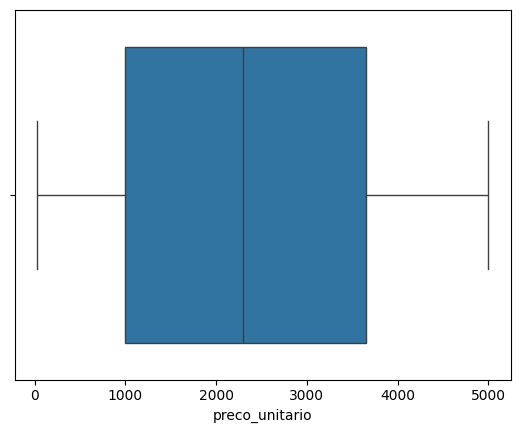

In [ ]:
sns.boxplot(x=df_filtrado['preco_unitario'])

In [ ]:
df_filtrado.head()

,pedido_id,categoria_produto,nome_produto,preco_unitario,quantidade
60,6025,Livros,Ficção Científica,43.23,"2,0"
88,6035,Livros,Ficção Científica,223.79,"1,0"
89,6035,Livros,Biografia,81.01,"2,0"
125,6046,Livros,Ficção Científica,205.33,"2,0"
177,6064,Livros,Romance,387.79,"2,0"


### Verificando Outliers na coluna quantidade

#### 📌 Conversão da coluna quantidade para float

In [ ]:
df_filtrado['quantidade'] = df_filtrado['quantidade'].str.replace(',','.',regex = False).astype(float)

#### 📌 Estatísticas descritivas por nome de produto

In [ ]:
df_filtrado.groupby('nome_produto')['quantidade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_produto,,,,,,,,
,157.0,6.955414,43.569182,1.0,1.0,2.0,3.0,424.0
Aspirador de Pó,955.0,3.152880,17.801069,1.0,1.0,2.0,3.0,434.0
Autoajuda,87.0,2.022989,0.875732,1.0,1.0,2.0,3.0,3.0
Bicicleta,191.0,4.219895,30.907737,1.0,1.0,2.0,3.0,429.0
Biografia,75.0,2.053333,0.820239,1.0,1.0,2.0,3.0,3.0
Bola de Futebol,209.0,3.622010,18.566297,1.0,1.0,2.0,3.0,247.0
Cadeira,938.0,3.698294,24.047082,1.0,1.0,2.0,3.0,488.0
Calça Jeans,988.0,4.415992,26.949200,1.0,1.0,2.0,3.0,473.0
Camiseta,960.0,4.445833,27.980389,1.0,1.0,2.0,3.0,451.0


#### 📌 Função para remoção de outliers pelo método IQR

In [ ]:
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    mask = (df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)
    return df[mask].copy()

In [ ]:
df_filtrado_semOutliers = remover_outliers_iqr(df_filtrado,'quantidade')

In [ ]:
df_filtrado_semOutliers.groupby('nome_produto')['quantidade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_produto,,,,,,,,
,155.0,2.045161,0.808574,1.0,1.0,2.0,3.0,3.0
Aspirador de Pó,950.0,2.029474,0.818113,1.0,1.0,2.0,3.0,3.0
Autoajuda,87.0,2.022989,0.875732,1.0,1.0,2.0,3.0,3.0
Bicicleta,190.0,1.984211,0.786637,1.0,1.0,2.0,3.0,3.0
Biografia,75.0,2.053333,0.820239,1.0,1.0,2.0,3.0,3.0
Bola de Futebol,207.0,1.922705,0.771970,1.0,1.0,2.0,3.0,3.0
Cadeira,931.0,1.994629,0.798502,1.0,1.0,2.0,3.0,3.0
Calça Jeans,979.0,1.991828,0.823936,1.0,1.0,2.0,3.0,3.0
Camiseta,952.0,2.027311,0.823734,1.0,1.0,2.0,3.0,3.0


In [ ]:
df_filtrado = df_filtrado_semOutliers.copy()

### Verificando e limpando dados vazios e NaN

In [ ]:
df_filtrado.shape

(12714, 5)

In [ ]:
df_filtrado.isna().sum()

,0
pedido_id,0
categoria_produto,0
nome_produto,125
preco_unitario,0
quantidade,0


In [ ]:
df_limpo = df_filtrado.dropna(subset=['nome_produto', 'preco_unitario'])

### 🧹 Remoção de linhas com dados faltantes

Durante a análise dos dados do nosso e-commerce, identificamos linhas no DataFrame `df_filtrado` com valores ausentes (`NaN` ou vazios) nas colunas `nome_produto` e/ou `preco_unitario`.

#### 🔎 Por que remover essas linhas?

- **Ausência de identificação do produto**  
  Sem o nome do produto (ou um identificador equivalente), não é possível saber a que item aquele preço corresponde. Isso impede validações, análises ou imputações confiáveis.

- **Grande variação de preço entre produtos**  
  Como os preços podem variar muito de um produto para outro (exemplo: eletrônicos, moda), não há um valor padrão ou fixo para substituir com segurança os dados faltantes.

- **Risco para as análises**  
  Manter esses registros incompletos poderia distorcer estatísticas (como média e mediana), análises de distribuição (exemplo: boxplots) e os insights extraídos.

- **Impossibilidade de correção via regras de negócio**  
  Sem o nome do produto, não conseguimos aplicar limites específicos de preço para cada tipo de item, nem validar se o preço faz sentido.

#### ✅ Decisão
Diante disso, optamos por **remover as linhas com dados faltantes** nas colunas `nome_produto` e `preco_unitario`, garantindo assim a qualidade e a confiabilidade das análises posteriores.

#### 💡 Código utilizado
```python
df_limpo = df_filtrado.dropna(subset=['nome_produto', 'preco_unitario'])


## ⚙️ Ajustando o DataFrame final

Como visto através do metodo info() há algumas colunas que não estão no formato correto para se trabalhar, vamos converter para os tipos corretos:

In [ ]:
df_limpo.reset_index(drop=True, inplace=True)

In [ ]:
df_limpo

,pedido_id,categoria_produto,nome_produto,preco_unitario,quantidade
0,6025,Livros,Ficção Científica,43.23,2.0
1,6035,Livros,Ficção Científica,223.79,1.0
2,6035,Livros,Biografia,81.01,2.0
3,6046,Livros,Ficção Científica,205.33,2.0
4,6064,Livros,Romance,387.79,2.0
...,...,...,...,...,...
12584,12986,Moda,Jaqueta,1670.06,3.0
12585,12993,Moda,Calça Jeans,2378.83,2.0
12586,12994,Moda,Calça Jeans,1408.81,3.0
12587,12994,Moda,Jaqueta,2800.25,1.0


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pedido_id          12589 non-null  int64  
 1   categoria_produto  12589 non-null  object 
 2   nome_produto       12589 non-null  object 
 3   preco_unitario     12589 non-null  float64
 4   quantidade         12589 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 491.9+ KB


In [ ]:
df_limpo.to_csv('itens_pedido', index = False)

# Pedido

## 📚 Dicionário de dados

| Coluna              | Tipo       | Descrição                                                 |
|----------------------|------------|-----------------------------------------------------------|
| pedido_id           | string/int | Identificador único do pedido                             |
| data_pedido         | datetime   | Data em que o pedido foi realizado                        |
| cliente_id          | string     | Identificador único do cliente                            |
| estado              | string     | Estado de destino do pedido                               |
| cidade              | string     | Cidade de destino do pedido                               |
| forma_pagamento     | string     | Forma de pagamento utilizada (ex.: cartão, boleto, pix)   |
| entregue_no_prazo   | bool       | Indica se o pedido foi entregue no prazo (True/False)     |
| valor_total         | float      | Valor total do pedido                                     |


## ⬇️ Importando e conhecendo a base de dados

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pedidos = pd.read_csv('/content/drive/MyDrive/Dados/Projeto Python da DS/Pedidos_Ecommerce (1).csv', sep=';')
pedidos

,pedido_id,data_pedido,cliente_id,estado,cidade,forma_pagamento,entregue_no_prazo,valor_total
0,6001,2025-04-26,C6000,RJ,Rio de Janeiro,Boleto,Sim,"7236,959999999999"
1,6002,2025-04-28,C6001,BA,Salvador,Cartão de crédito,Sim,"8922,57"
2,6003,2025-02-04,C6002,PE,Recife,Cartão de crédito,Sim,"28278,969999999998"
3,6004,2025-04-24,C6003,BA,Salvador,Cartão de crédito,Sim,"21251,43"
4,6005,2025-02-21,C6004,AM,Parintins,Cartão de débito,Não,"8391,7"
...,...,...,...,...,...,...,...,...
6995,12996,2025-05-16,C12995,MG,Uberlândia,Cartão de crédito,Sim,"9484,02"
6996,12997,2025-02-23,C12996,AM,Parintins,Pix,Não,"4091,8199999999997"
6997,12998,2025-04-30,C12997,MG,Uberlândia,Boleto,Sim,"26293,620000000003"
6998,12999,2025-02-28,C12998,PE,Recife,Boleto,Sim,"14431,030000000002"


In [ ]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pedido_id          7000 non-null   int64 
 1   data_pedido        7000 non-null   object
 2   cliente_id         7000 non-null   object
 3   estado             7000 non-null   object
 4   cidade             7000 non-null   object
 5   forma_pagamento    7000 non-null   object
 6   entregue_no_prazo  7000 non-null   object
 7   valor_total        7000 non-null   object
dtypes: int64(1), object(7)
memory usage: 437.6+ KB


## 🔄️ Convertendo tipos

In [ ]:
pedidos['valor_total'] = pedidos['valor_total'].str.replace(',','.', regex = False).astype(float)

In [ ]:
pedidos['valor_total'] = pedidos['valor_total'].round(2)
pedidos

,pedido_id,data_pedido,cliente_id,estado,cidade,forma_pagamento,entregue_no_prazo,valor_total
0,6001,2025-04-26,C6000,RJ,Rio de Janeiro,Boleto,Sim,7236.96
1,6002,2025-04-28,C6001,BA,Salvador,Cartão de crédito,Sim,8922.57
2,6003,2025-02-04,C6002,PE,Recife,Cartão de crédito,Sim,28278.97
3,6004,2025-04-24,C6003,BA,Salvador,Cartão de crédito,Sim,21251.43
4,6005,2025-02-21,C6004,AM,Parintins,Cartão de débito,Não,8391.70
...,...,...,...,...,...,...,...,...
6995,12996,2025-05-16,C12995,MG,Uberlândia,Cartão de crédito,Sim,9484.02
6996,12997,2025-02-23,C12996,AM,Parintins,Pix,Não,4091.82
6997,12998,2025-04-30,C12997,MG,Uberlândia,Boleto,Sim,26293.62
6998,12999,2025-02-28,C12998,PE,Recife,Boleto,Sim,14431.03


In [ ]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pedido_id          7000 non-null   int64  
 1   data_pedido        7000 non-null   object 
 2   cliente_id         7000 non-null   object 
 3   estado             7000 non-null   object 
 4   cidade             7000 non-null   object 
 5   forma_pagamento    7000 non-null   object 
 6   entregue_no_prazo  7000 non-null   object 
 7   valor_total        7000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 437.6+ KB


In [ ]:
pedidos_que_existem = df_limpo['pedido_id'].unique()

df_pedidos_filtrado = pedidos[pedidos['pedido_id'].isin(pedidos_que_existem)].copy()

In [ ]:
df_pedidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6084 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pedido_id          6084 non-null   int64  
 1   data_pedido        6084 non-null   object 
 2   cliente_id         6084 non-null   object 
 3   estado             6084 non-null   object 
 4   cidade             6084 non-null   object 
 5   forma_pagamento    6084 non-null   object 
 6   entregue_no_prazo  6084 non-null   object 
 7   valor_total        6084 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 427.8+ KB


In [ ]:
df_pedidos_filtrado.reset_index(drop=True, inplace= True)

In [ ]:
df_pedidos_filtrado

,pedido_id,data_pedido,cliente_id,estado,cidade,forma_pagamento,entregue_no_prazo,valor_total
0,6001,2025-04-26,C6000,RJ,Rio de Janeiro,Boleto,Sim,7236.96
1,6002,2025-04-28,C6001,BA,Salvador,Cartão de crédito,Sim,8922.57
2,6003,2025-02-04,C6002,PE,Recife,Cartão de crédito,Sim,28278.97
3,6004,2025-04-24,C6003,BA,Salvador,Cartão de crédito,Sim,21251.43
4,6006,2025-02-09,C6005,RS,Porto Alegre,Cartão de débito,Não,13386.82
...,...,...,...,...,...,...,...,...
6079,12996,2025-05-16,C12995,MG,Uberlândia,Cartão de crédito,Sim,9484.02
6080,12997,2025-02-23,C12996,AM,Parintins,Pix,Não,4091.82
6081,12998,2025-04-30,C12997,MG,Uberlândia,Boleto,Sim,26293.62
6082,12999,2025-02-28,C12998,PE,Recife,Boleto,Sim,14431.03


In [ ]:
filtro = df_limpo['pedido_id'] == 6035
df_limpo[filtro]

,pedido_id,categoria_produto,nome_produto,preco_unitario,quantidade
1,6035,Livros,Ficção Científica,223.79,1.0
2,6035,Livros,Biografia,81.01,2.0


In [ ]:
df_limpo['Valor_Total_Item'] = df_limpo['preco_unitario'] * df_limpo['quantidade']

<ipython-input-42-3510067040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['Valor_Total_Item'] = df_limpo['preco_unitario'] * df_limpo['quantidade']


In [ ]:
df_total_pedido = df_limpo.groupby('pedido_id')['Valor_Total_Item'].sum().reset_index()
df_total_pedido.rename(columns={'Valor_Total_Item': 'valor_total'}, inplace=True)

df_pedidos_filtrado = df_pedidos_filtrado.merge(df_total_pedido, on='pedido_id', how='left')

In [ ]:
df_pedidos_filtrado

,pedido_id,data_pedido,cliente_id,estado,cidade,forma_pagamento,entregue_no_prazo,valor_total_x,valor_total_y
0,6001,2025-04-26,C6000,RJ,Rio de Janeiro,Boleto,Sim,7236.96,3855.81
1,6002,2025-04-28,C6001,BA,Salvador,Cartão de crédito,Sim,8922.57,5305.57
2,6003,2025-02-04,C6002,PE,Recife,Cartão de crédito,Sim,28278.97,18094.91
3,6004,2025-04-24,C6003,BA,Salvador,Cartão de crédito,Sim,21251.43,14052.66
4,6006,2025-02-09,C6005,RS,Porto Alegre,Cartão de débito,Não,13386.82,13386.82
...,...,...,...,...,...,...,...,...,...
6079,12996,2025-05-16,C12995,MG,Uberlândia,Cartão de crédito,Sim,9484.02,5165.94
6080,12997,2025-02-23,C12996,AM,Parintins,Pix,Não,4091.82,2597.43
6081,12998,2025-04-30,C12997,MG,Uberlândia,Boleto,Sim,26293.62,23563.02
6082,12999,2025-02-28,C12998,PE,Recife,Boleto,Sim,14431.03,9358.81


In [ ]:
df_pedidos_filtrado.rename(columns={'valor_total_y': 'valor_total'}, inplace=True)
df_pedidos_filtrado.drop(columns=['valor_total_x'], inplace=True)

In [ ]:
df_pedidos_filtrado

,pedido_id,data_pedido,cliente_id,estado,cidade,forma_pagamento,entregue_no_prazo,valor_total
0,6001,2025-04-26,C6000,RJ,Rio de Janeiro,Boleto,Sim,3855.81
1,6002,2025-04-28,C6001,BA,Salvador,Cartão de crédito,Sim,5305.57
2,6003,2025-02-04,C6002,PE,Recife,Cartão de crédito,Sim,18094.91
3,6004,2025-04-24,C6003,BA,Salvador,Cartão de crédito,Sim,14052.66
4,6006,2025-02-09,C6005,RS,Porto Alegre,Cartão de débito,Não,13386.82
...,...,...,...,...,...,...,...,...
6079,12996,2025-05-16,C12995,MG,Uberlândia,Cartão de crédito,Sim,5165.94
6080,12997,2025-02-23,C12996,AM,Parintins,Pix,Não,2597.43
6081,12998,2025-04-30,C12997,MG,Uberlândia,Boleto,Sim,23563.02
6082,12999,2025-02-28,C12998,PE,Recife,Boleto,Sim,9358.81


In [ ]:
df_pedidos_filtrado.to_csv('pedidos', index = False)